In [2]:
!pip install pandas_datareader

  Obtaining dependency information for pandas_datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.9 MB/s eta 0:00:00 0:00:01


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    globals()[stock].name = stock
    

company_list = [AAPL, GOOG, MSFT, AMZN]
# company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# for company, com_name in zip(company_list, company_name):
#     company["company_name"] = com_name
    
# df = pd.concat(company_list, axis=0)
# df.tail(10)
GOOG.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-31,173.399994,174.419998,170.970001,173.960007,173.762268,28085200
2024-06-03,173.880005,175.860001,172.449997,174.419998,174.221741,20742800
2024-06-04,174.449997,175.190002,173.220001,175.130005,174.930939,14066600
2024-06-05,176.535004,177.970001,175.289993,177.070007,176.868744,15233900
2024-06-06,177.429993,178.710007,177.210007,178.350006,178.147278,14255800
2024-06-07,178.460007,179.419998,175.789993,175.949997,175.750000,14716300
2024-06-10,176.449997,178.470001,174.380005,176.630005,176.630005,17122200
2024-06-11,177.720001,178.389999,175.440002,178.190002,178.190002,14402400
2024-06-12,179.750000,182.080002,177.779999,179.559998,179.559998,18600400


In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,183.018929,184.576587,181.624047,183.149484,182.856329,5.902615e+07
std,9.105211,9.175728,9.097436,9.212915,9.167802,2.174365e+07
min,165.350006,166.399994,164.080002,165.000000,165.000000,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,175.038933,4.674302e+07
50%,183.514999,185.064995,181.970001,183.904999,183.387993,5.307365e+07
75%,190.477501,191.827503,189.287498,190.564995,190.031841,6.546370e+07
max,214.740005,220.199997,211.600006,214.240005,214.240005,1.981343e+08


In [5]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-06-14 to 2024-06-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


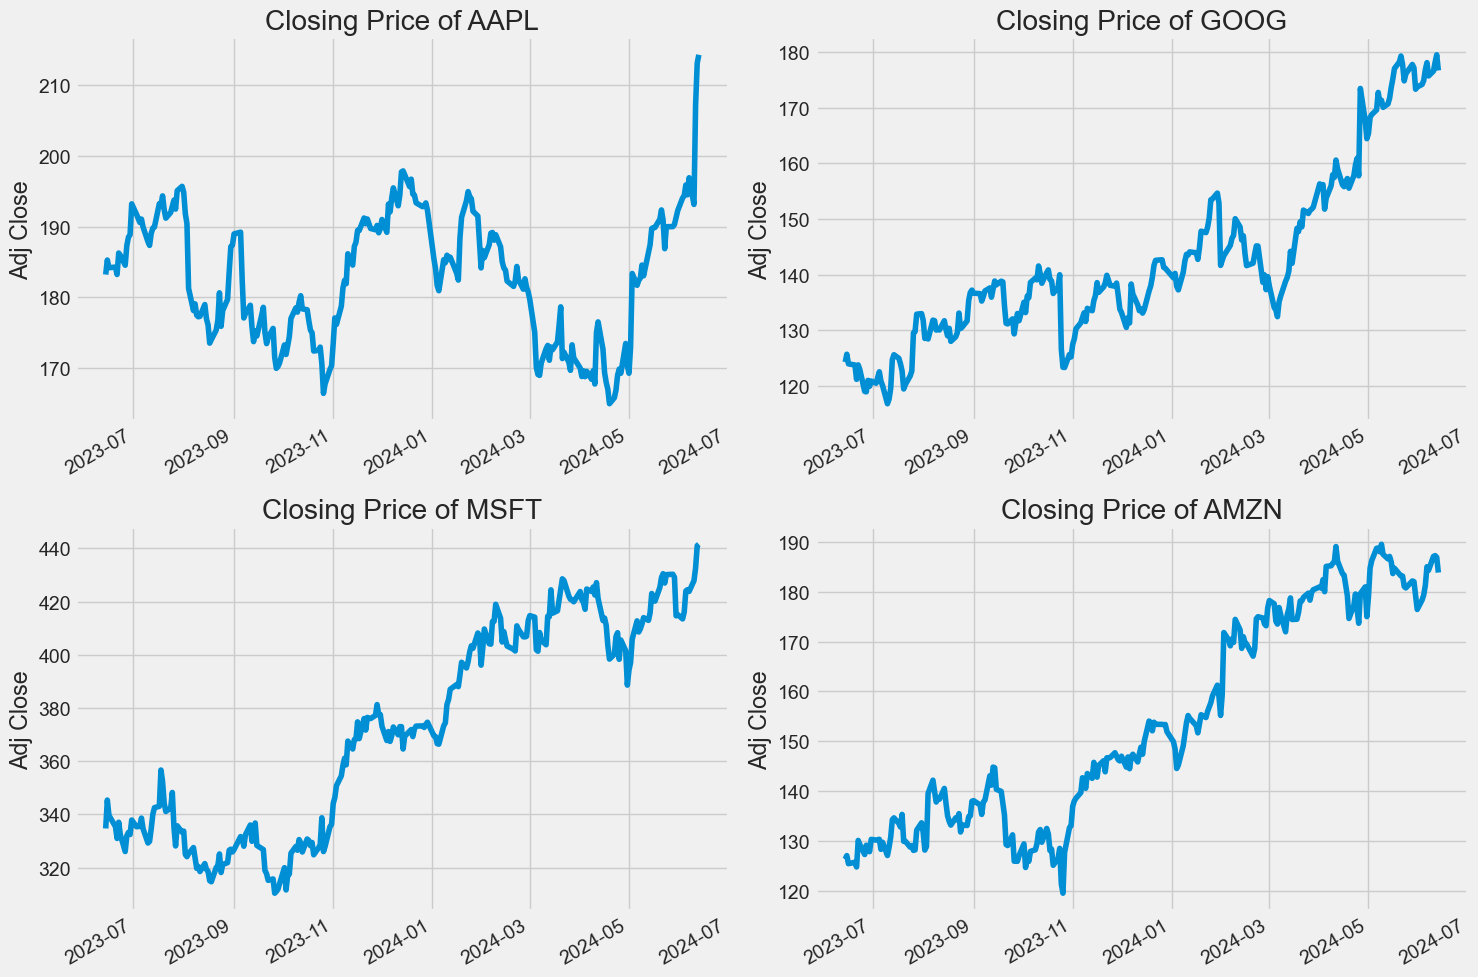

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company.name}")
    
plt.tight_layout()

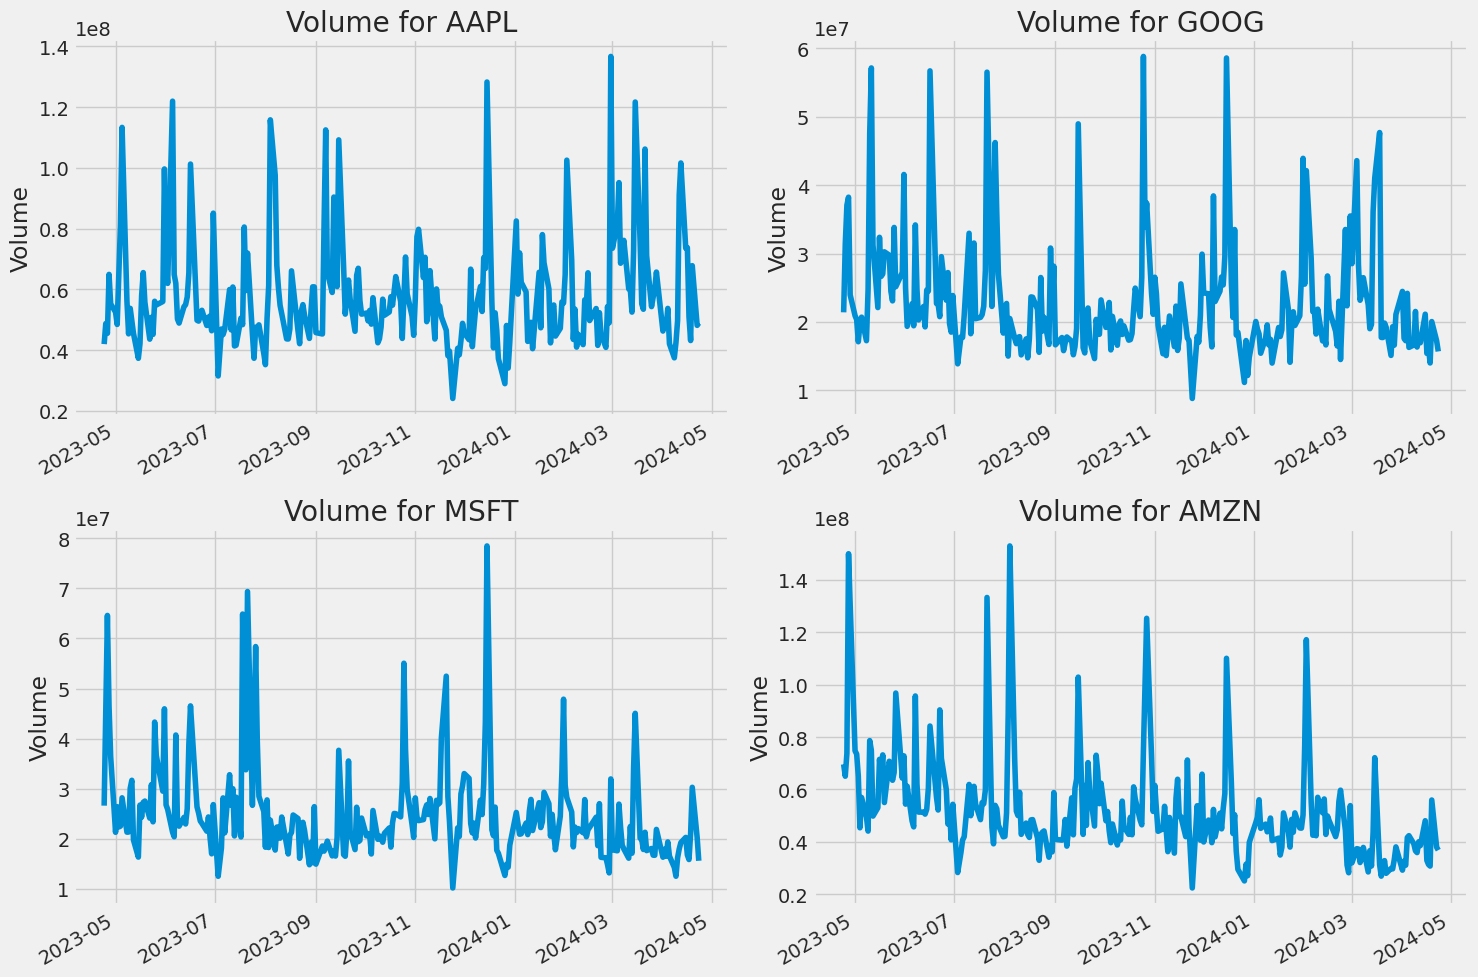

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume for {company.name}")
    
plt.tight_layout()

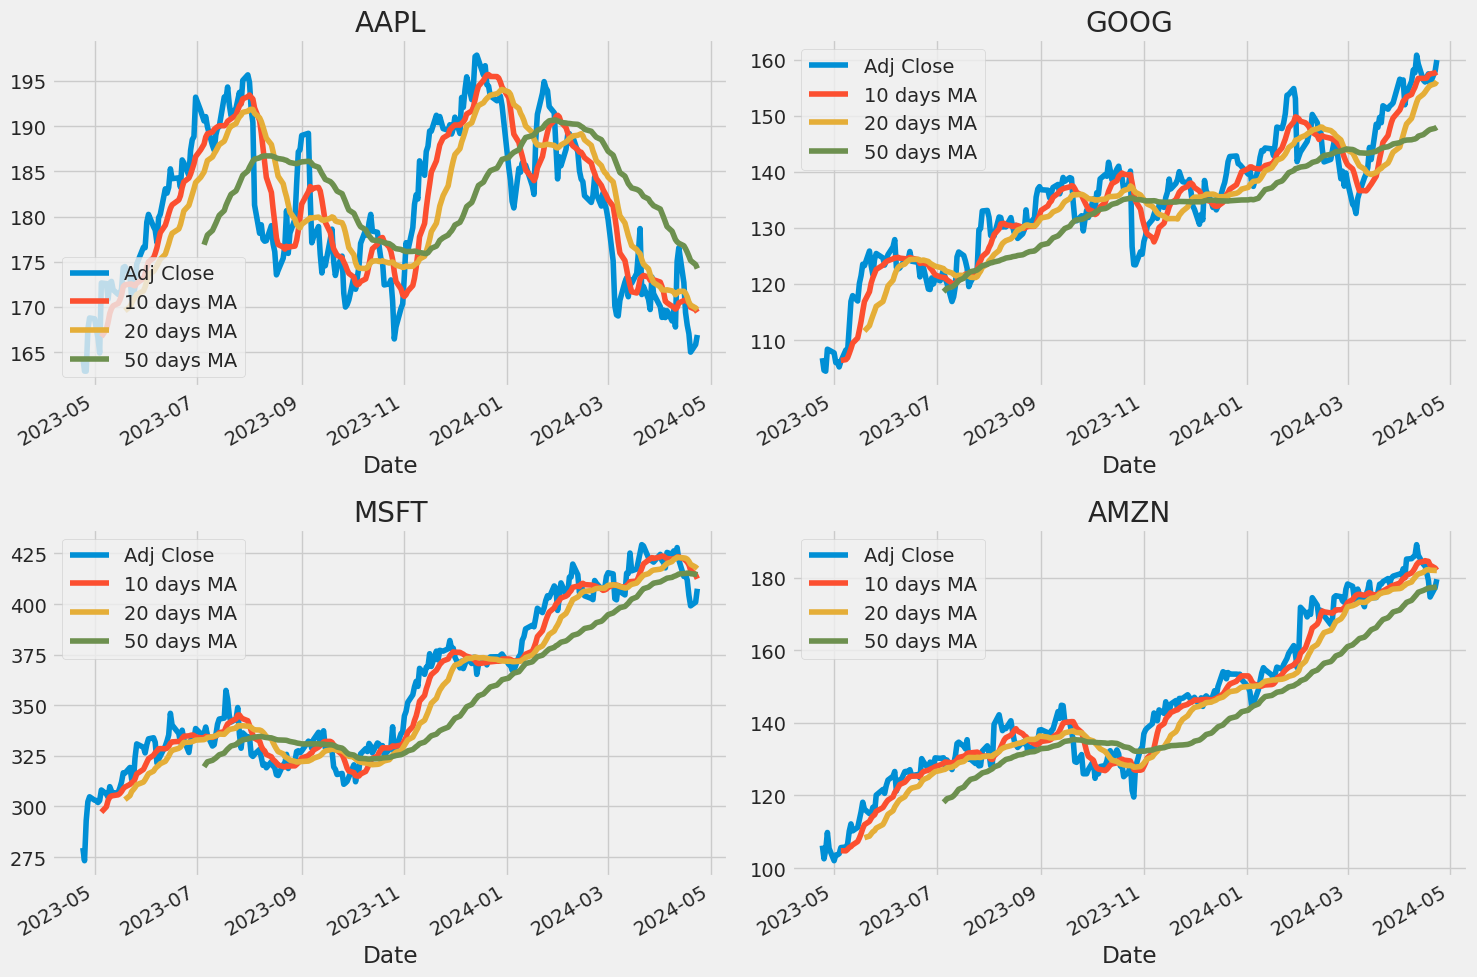

In [7]:
ma_day = [10, 20, 50]

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

def get_axes_indeces(i):
    match i:
        case 0:
            return 0, 0
        case 1:
            return 0, 1
        case 2:
            return 1, 0
        case 3:
            return 1, 1
        

for i, company in enumerate(company_list):
    for ma in ma_day:
        column_name = f"{ma} days MA"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
    
    a0, a1 = get_axes_indeces(i)
    company[['Adj Close', '10 days MA', '20 days MA', '50 days MA']].plot(ax=axes[a0,a1])
    axes[a0,a1].set_title(company.name)
        

fig.tight_layout()

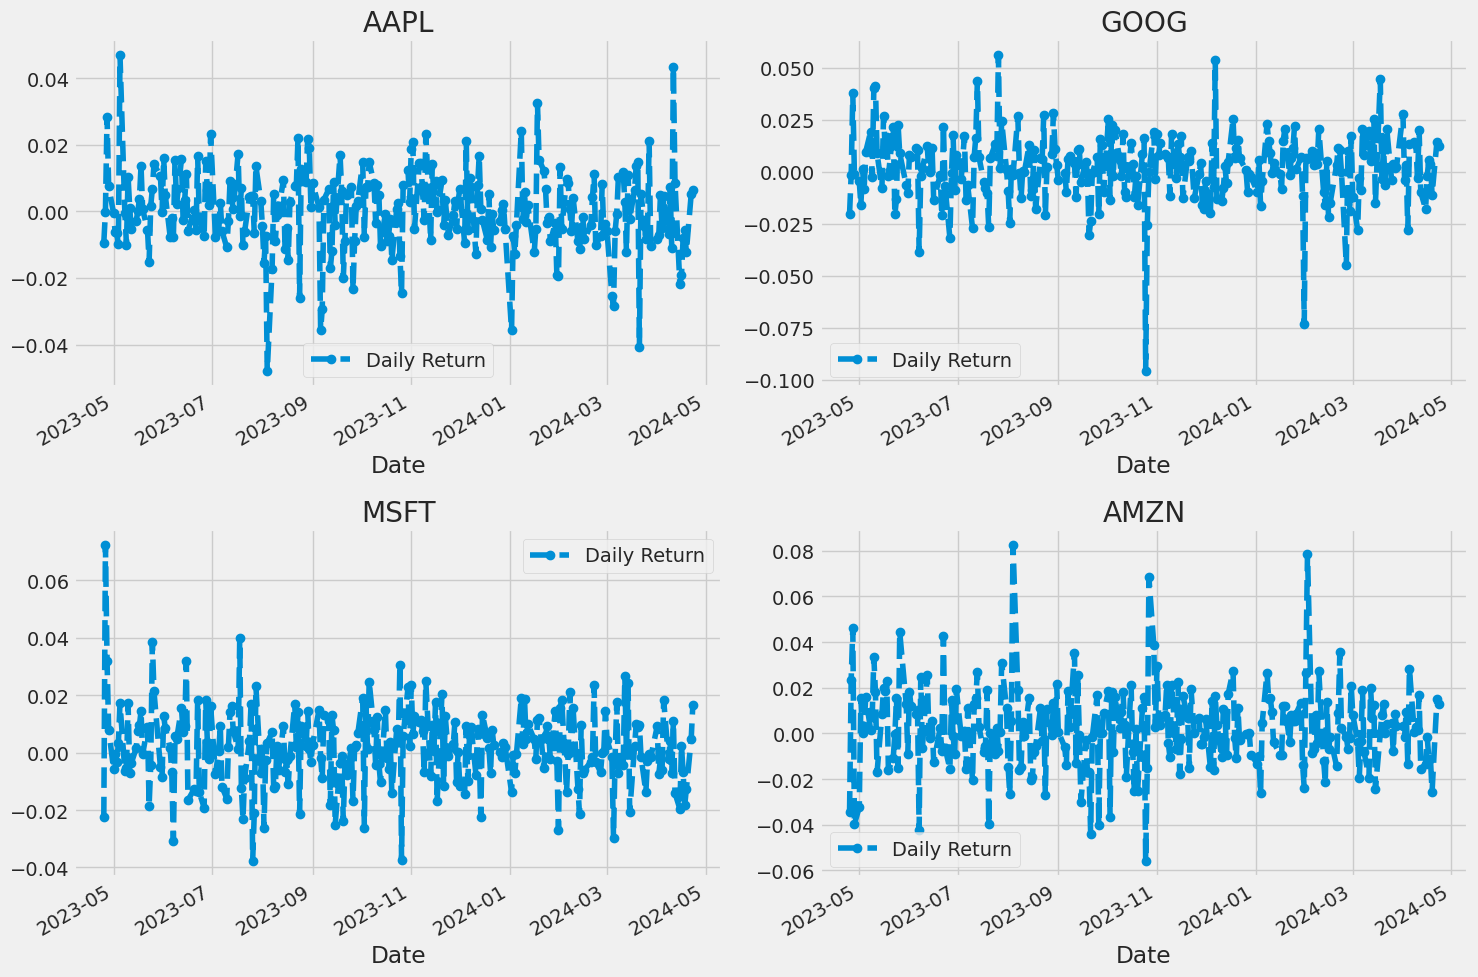

In [8]:
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)


# We'll use pct_change to find the percent change for each day
for i, company in enumerate(company_list):
    company['Daily Return'] = company['Adj Close'].pct_change()
    
    a0, a1 = get_axes_indeces(i)
    company['Daily Return'].plot(ax=axes[a0,a1], legend=True, linestyle='--', marker='o')
    axes[a0,a1].set_title(company.name)



# AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
# axes[0,0].set_title('APPLE')

# GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
# axes[0,1].set_title('GOOGLE')

# MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
# axes[1,0].set_title('MICROSOFT')

# AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
# axes[1,1].set_title('AMAZON')

fig.tight_layout()

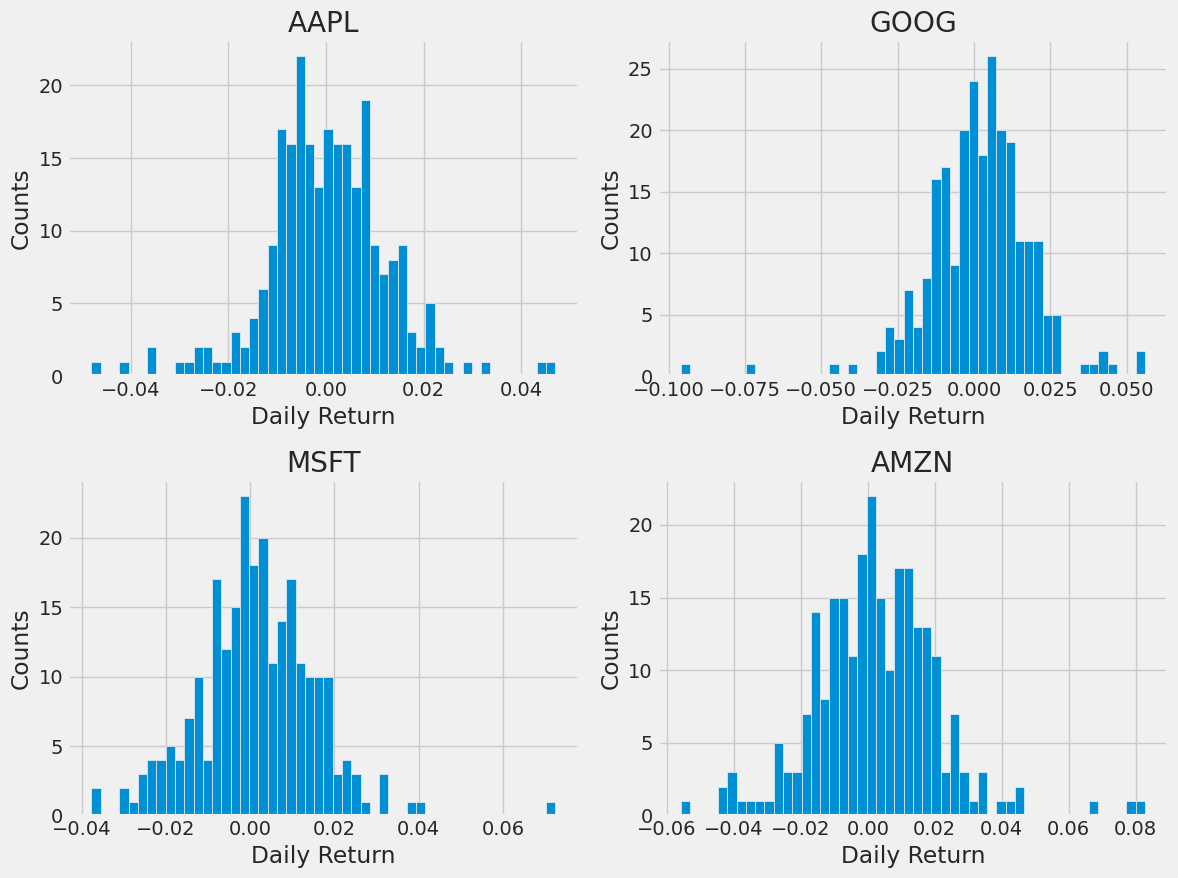

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company.name}')
    
plt.tight_layout()

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change().dropna()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-25,-0.009436,-0.034272,-0.020322,-0.022536
2023-04-26,-0.000061,0.023496,-0.001530,0.072435
2023-04-27,0.028395,0.046104,0.037530,0.032028
2023-04-28,0.007541,-0.039792,-0.001384,0.007972
2023-05-01,-0.000530,-0.032243,-0.004713,-0.005533


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

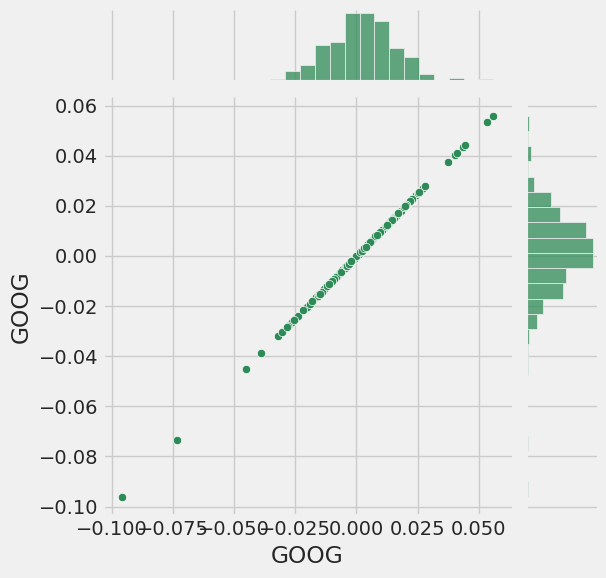

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

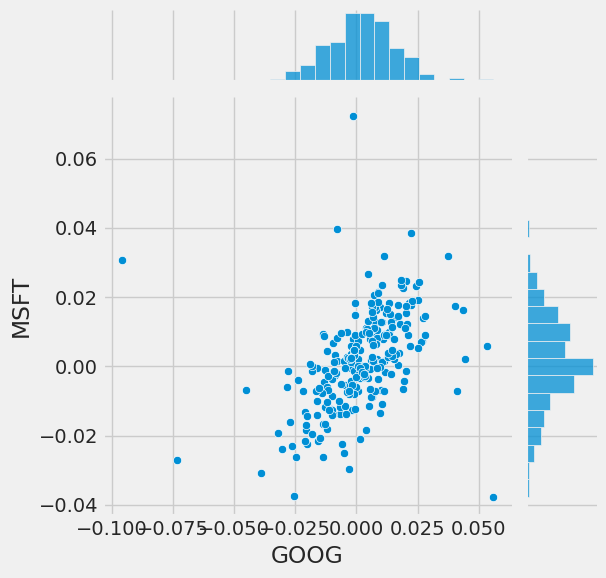

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

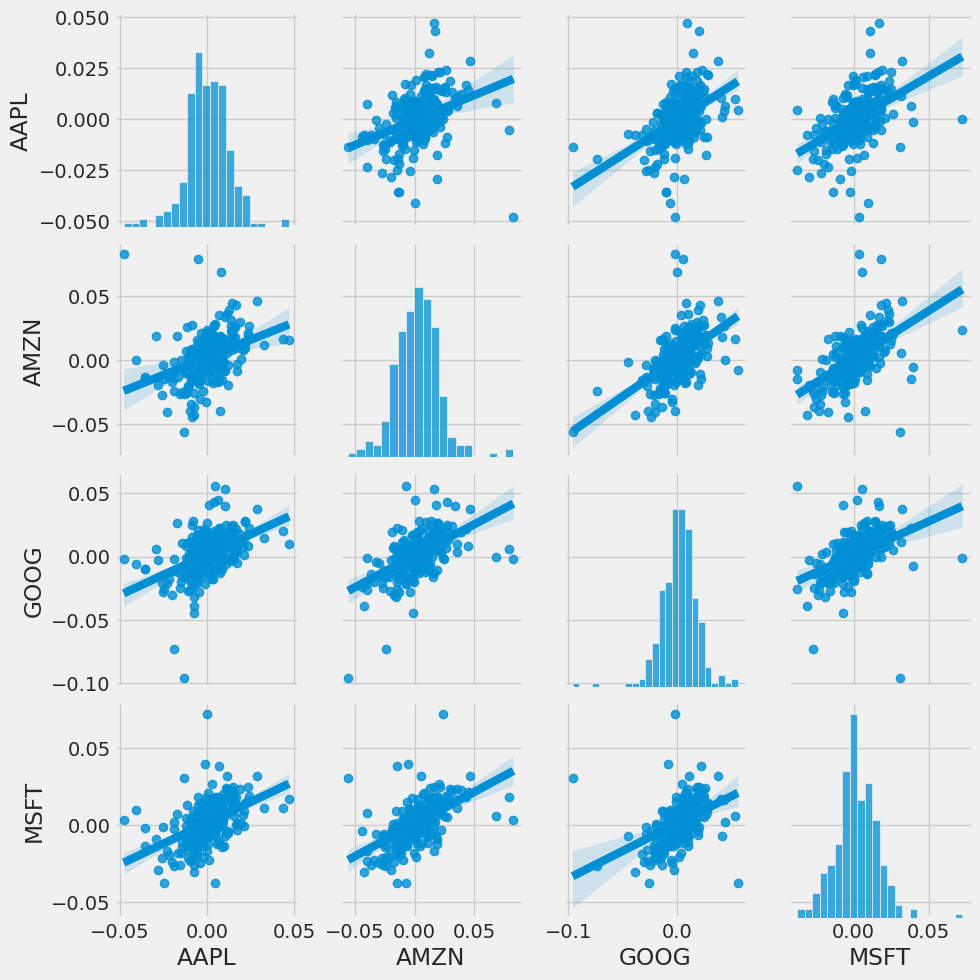

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

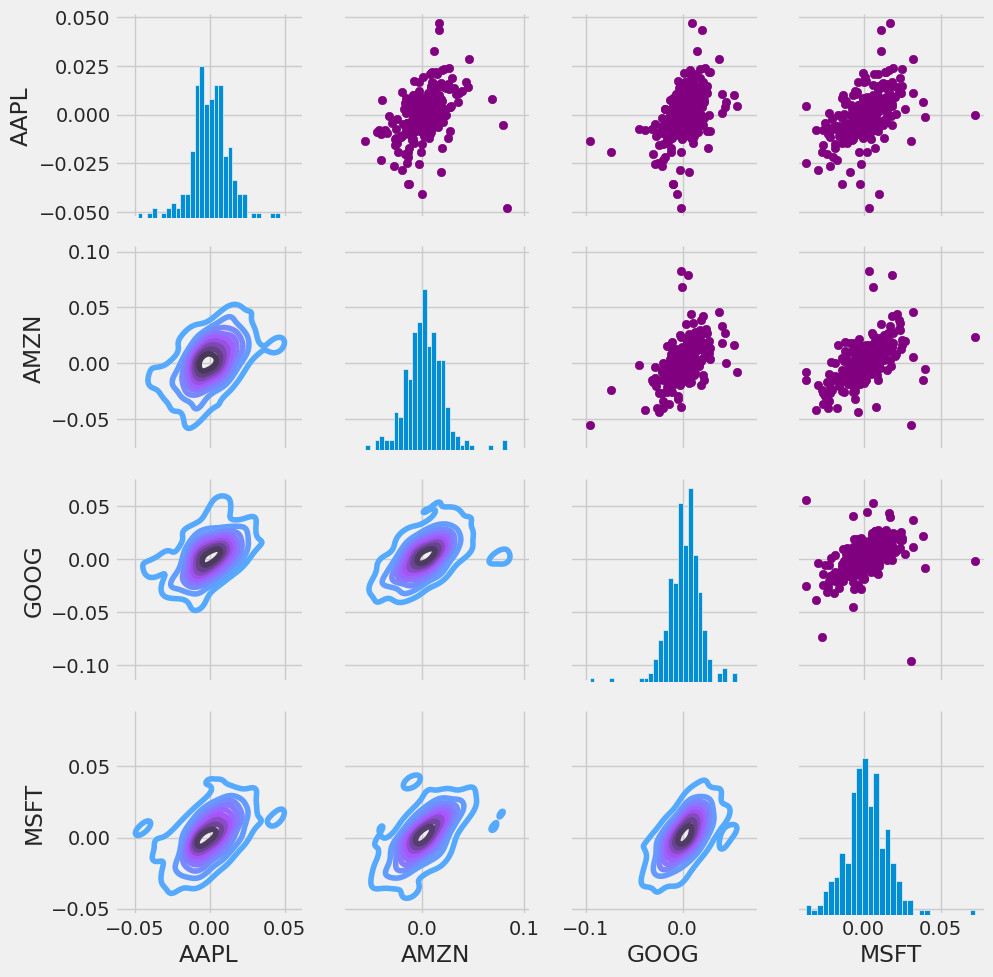

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

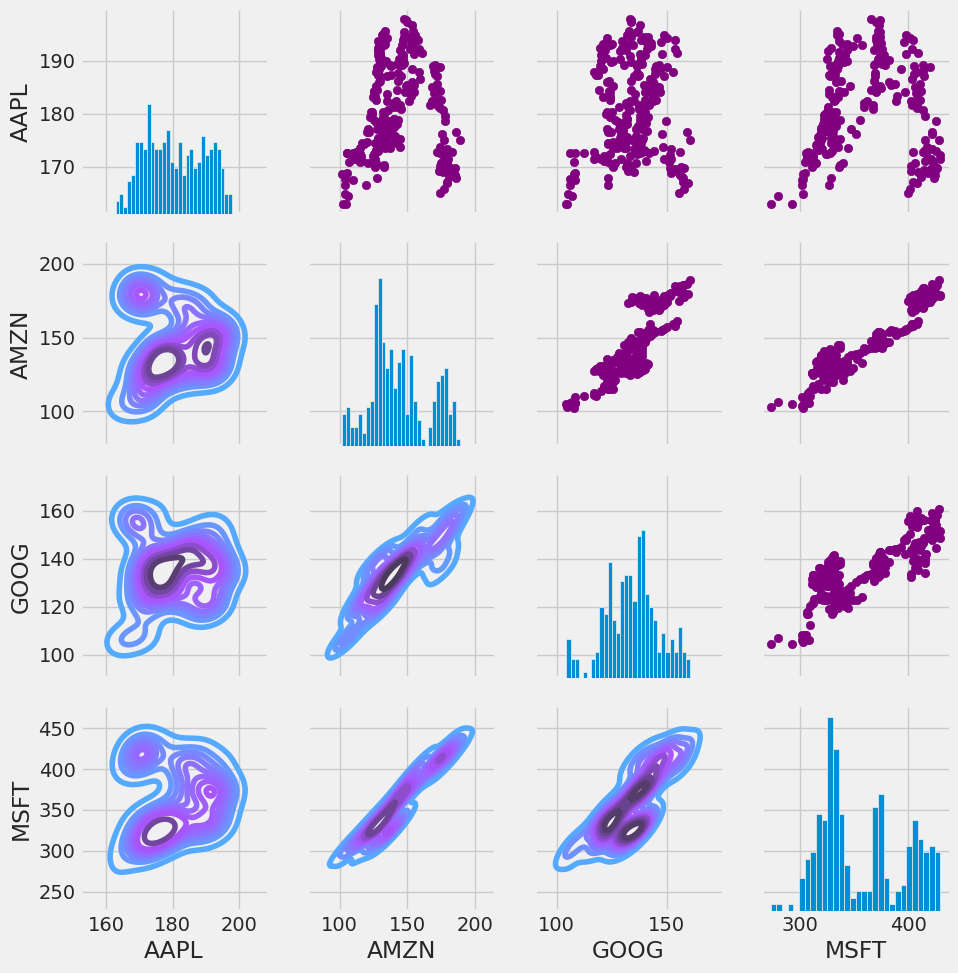

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

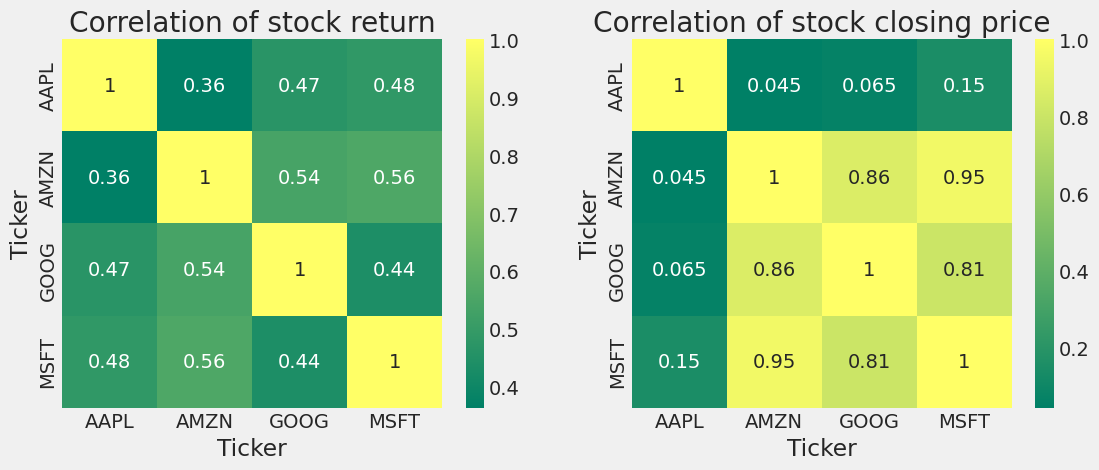

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

In [17]:
# rets = tech_rets.dropna()

# area = np.pi * 20

# plt.figure(figsize=(10, 8))
# plt.scatter(rets.mean(), rets.std(), s=area)
# plt.xlabel('Expected return')
# plt.ylabel('Risk')

# for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
#     plt.annotate(label, xy=(x, y), xytext=(40, 40), textcoords='offset points', ha='right', va='bottom', 
#                  arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 5. Predicting the closing price stock price of APPLE inc:
1. LSTM
2. GRU

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771563,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400
...,...,...,...,...,...,...
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100


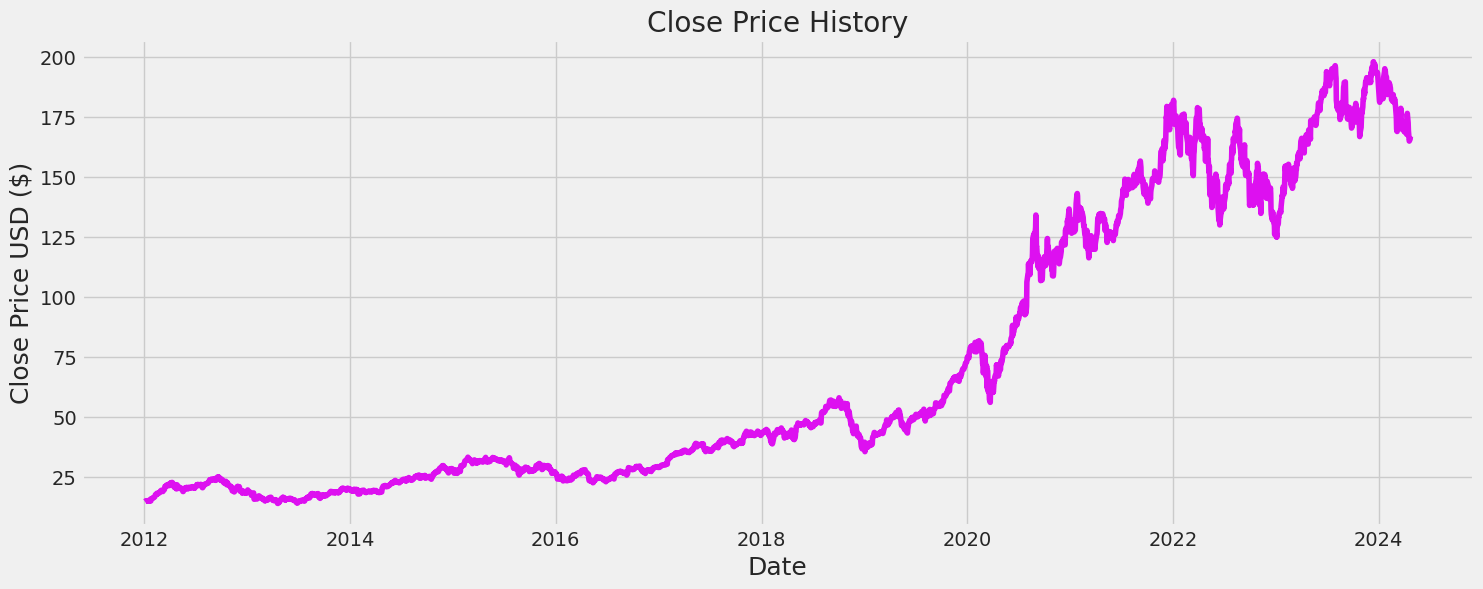

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'], c='#dd10f0')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2942

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.82021312],
       [0.82477429],
       [0.83053007]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train, end="\n\n")
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

## LSTM 

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(x_train, y_train, batch_size=1, epochs=1)

2024-04-23 22:09:02.249573: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 22:09:02.249719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 22:09:02.380305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2882/2882 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0028


## GRU

In [24]:
# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_gru.add(GRU(64, return_sequences=False))
model_gru.add(Dense(25))
model_gru.add(Dense(1))

# Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_gru.fit(x_train, y_train, batch_size=1, epochs=1)

2882/2882 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.0019


## Metrics Comparison

In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions_lstm = model_lstm.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

predictions_gru = model_gru.predict(x_test)
predictions_gru = scaler.inverse_transform(predictions_gru)

# Get the root mean squared error (RMSE)
rmse_lstm = np.sqrt(np.mean(((predictions_lstm - y_test) ** 2)))
rmse_gru = np.sqrt(np.mean(((predictions_gru - y_test) ** 2)))
rmse_lstm, rmse_gru

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


(6.172387474121523, 7.796782884853699)

## GRU

In [26]:
# from keras.models import Sequential
# from keras.layers import Dense, GRU

# # Build the LSTM model
# model = Sequential()
# model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(GRU(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(x_train, y_train, batch_size=1, epochs=1)

In [27]:
# # Create the testing data set
# # Create a new array containing scaled values from index 1543 to 2002 
# test_data = scaled_data[training_data_len - 60: , :]
# # Create the data sets x_test and y_test
# x_test = []
# y_test = dataset[training_data_len:, :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i-60:i, 0])
    
# # Convert the data to a numpy array
# x_test = np.array(x_test)

# # Reshape the data
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# # Get the models predicted price values 
# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)

# # Get the root mean squared error (RMSE)
# rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# rmse

/tmp/ipykernel_23/4137304876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions LSTM'] = predictions_lstm
/tmp/ipykernel_23/4137304876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions GRU'] = predictions_gru


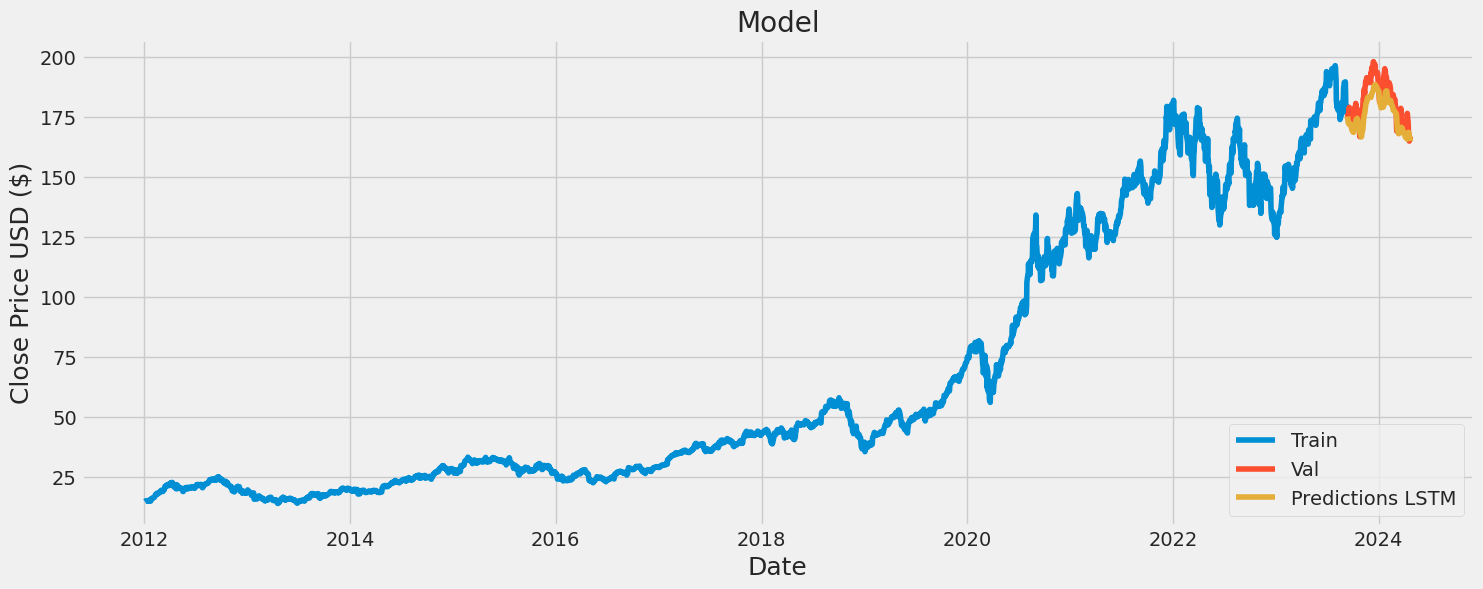

In [28]:
# Plot Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions LSTM'] = predictions_lstm
valid['Predictions GRU'] = predictions_gru
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions LSTM']])
plt.legend(['Train', 'Val', 'Predictions LSTM'], loc='lower right')
plt.show()

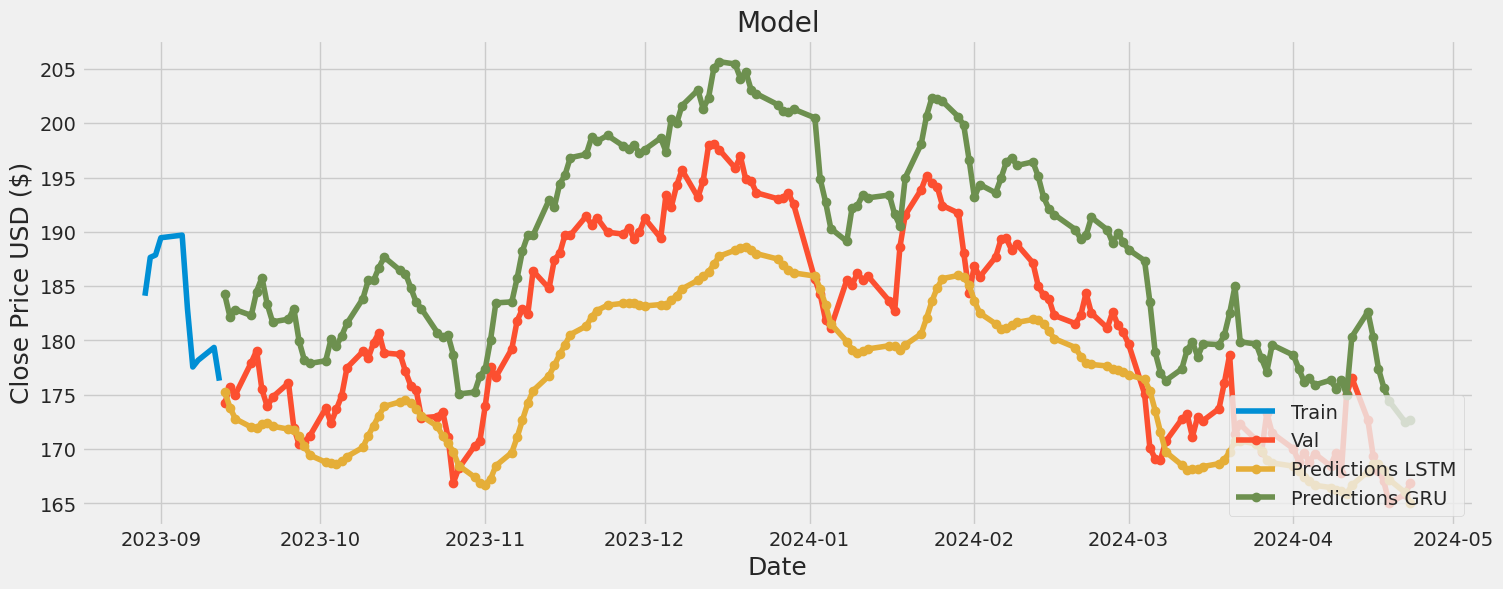

In [29]:
# Plot Data with Zoom on final validation
# train = data[:training_data_len]
# valid = data[training_data_len:]
# valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[-10:]['Close'])
plt.plot(valid[['Close', 'Predictions LSTM', 'Predictions GRU']], 'o-')
plt.legend(['Train', 'Val', 'Predictions LSTM', 'Predictions GRU'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions LSTM,Predictions GRU
Date,,,
2023-09-13,174.210007,175.290253,184.244263
2023-09-14,175.740005,173.815155,182.160355
2023-09-15,175.009995,172.787827,182.837723
2023-09-18,177.970001,172.023239,182.306015
2023-09-19,179.070007,171.945023,184.508896
...,...,...,...
2024-04-17,168.000000,168.637787,177.400635
2024-04-18,167.039993,168.072983,175.665070
2024-04-19,165.000000,167.194199,174.425339


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?